In [1]:
import pandas as pd
import datetime
import re
pd.set_option('display.max_columns', None, 'display.max_colwidth', 500)
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
df_comp = pd.read_csv('./crunchbase-data/crunchbase-companies.csv', encoding = 'latin1')
df_comp = df_comp.rename(columns={'permalink': 'company_permalink'})
df_comp.head()

,company_permalink,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/waywire,#waywire,news,1750000,operating,USA,NY,New York,New York,1,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,2013-09-06
1,/company/n-plusn,#NAME?,software,600000,operating,USA,NY,New York,New York,1,2012-01-01,2012-01,2012-Q1,2012.0,2012-08-29,2012-08-29,NaN
2,/company/club-domains,.Club Domains,software,7000000,operating,USA,FL,Fort Lauderdale,Oakland Park,1,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,NaN
3,/company/0xdata,0xdata,analytics,1700000,operating,USA,CA,SF Bay,Mountain View,1,NaN,NaN,NaN,NaN,2013-01-03,2013-01-03,2012-01-01
4,/company/1-800-dentist,1-800-DENTIST,health,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1986-01,1986-Q1,1986.0,2010-08-19,2010-08-19,2010-08-19


In [10]:
df_invest = pd.read_csv('./crunchbase-data/crunchbase-investments.csv', encoding = 'latin1', low_memory = False)
df_invest.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0,20000.0
2,/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012.0,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012.0,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011.0,20000.0


In [11]:
df_rounds = pd.read_csv('./crunchbase-data/crunchbase-rounds.csv', encoding = 'latin1', low_memory = False)
df_rounds.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/waywire,#waywire,news,USA,NY,New York,New York,series-a,2012-06-30,2012-06,2012-Q2,2012,1750000.0
1,/company/n-plusn,#NAME?,software,USA,NY,New York,New York,angel,2012-08-29,2012-08,2012-Q3,2012,600000.0
2,/company/club-domains,.Club Domains,software,USA,FL,Fort Lauderdale,Oakland Park,series-b,2013-05-31,2013-05,2013-Q2,2013,7000000.0
3,/company/0xdata,0xdata,analytics,USA,CA,SF Bay,Mountain View,venture,2013-01-03,2013-01,2013-Q1,2013,1700000.0
4,/company/1-800-dentist,1-800-DENTIST,health,USA,CA,Los Angeles,Los Angeles,venture,2010-08-19,2010-08,2010-Q3,2010,NaN


In [12]:
df_acq = pd.read_csv('./crunchbase-data/crunchbase-acquisitions.csv', encoding = 'latin1', low_memory = False)
df_acq.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code
0,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD
1,/company/100plus,100Plus,analytics,USA,CA,SF Bay,San Francisco,/company/practice-fusion,Practice Fusion,health,USA,CA,SF Bay,San Francisco,2013-02-27,2013-02,2013-Q1,2013.0,NaN,USD
2,/company/10best,10best,web,USA,SC,Greenville,Greenville,/company/nile-guide,NileGuide,travel,USA,CA,SF Bay,San Francisco,2011-01-25,2011-01,2011-Q1,2011.0,NaN,USD
3,/company/10east,10East,network_hosting,USA,FL,Jacksonville,Jacksonville,/company/railcar-management,Railcar Management,enterprise,NaN,NaN,unknown,NaN,2009-04-14,2009-04,2009-Q2,2009.0,NaN,USD
4,/company/12society,12Society,ecommerce,USA,CA,Los Angeles,West Hollywood,/company/quarterly,Quarterly,web,USA,CA,Los Angeles,West Hollywood,2013-07-03,2013-07,2013-Q3,2013.0,NaN,USD


In [15]:
df = df_acq.merge(df_rounds,on='company_permalink').merge(df_invest,on='company_permalink').merge(df_comp, on='company_permalink')

In [18]:
df.head()

,company_permalink,company_name_x,company_category_code_x,company_country_code_x,company_state_code_x,company_region_x,company_city_x,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,acquired_year,price_amount,price_currency_code,company_name_y,company_category_code_y,company_country_code_y,company_state_code_y,company_region_y,company_city_y,funding_round_type_x,funded_at_x,funded_month_x,funded_quarter_x,funded_year_x,raised_amount_usd_x,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type_y,funded_at_y,funded_month_y,funded_quarter_y,funded_year_y,raised_amount_usd_y,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,last_milestone_at
0,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,angel,2010-01-01,2010-01,2010-Q1,2010,15000.0,1000memories,web,USA,CA,SF Bay,San Francisco,/company/y-combinator,Y Combinator,finance,USA,CA,SF Bay,Mountain View,angel,2010-01-01,2010-01,2010-Q1,2010.0,15000.0,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
1,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,angel,2010-01-01,2010-01,2010-Q1,2010,15000.0,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/felicis-ventures,Felicis Ventures,NaN,USA,CA,SF Bay,Palo Alto,series-a,2011-02-16,2011-02,2011-Q1,2011.0,2520000.0,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
2,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,angel,2010-01-01,2010-01,2010-Q1,2010,15000.0,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/floodgate,FLOODGATE,NaN,USA,CA,SF Bay,Palo Alto,series-a,2011-02-16,2011-02,2011-Q1,2011.0,2520000.0,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
3,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,angel,2010-01-01,2010-01,2010-Q1,2010,15000.0,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/founder-collective,Founder Collective,NaN,USA,NY,New York,New York,angel,2010-01-01,2010-01,2010-Q1,2010.0,15000.0,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04
4,/company/1000memories,1000memories,web,USA,CA,SF Bay,San Francisco,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,2012.0,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,angel,2010-01-01,2010-01,2010-Q1,2010,15000.0,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/greylock,Greylock Partners,NaN,USA,CA,SF Bay,Menlo Park,series-a,2011-02-16,2011-02,2011-Q1,2011.0,2520000.0,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,2013-07-04


In [29]:
del_list = [key for key in df.keys() if '_x' in key or '_y' in key]
for col in del_list:
    del df[col]

['company_name_x',
 'company_category_code_x',
 'company_country_code_x',
 'company_state_code_x',
 'company_region_x',
 'company_city_x',
 'acquired_year',
 'company_name_y',
 'company_category_code_y',
 'company_country_code_y',
 'company_state_code_y',
 'company_region_y',
 'company_city_y',
 'funding_round_type_x',
 'funded_at_x',
 'funded_month_x',
 'funded_quarter_x',
 'funded_year_x',
 'raised_amount_usd_x',
 'funding_round_type_y',
 'funded_at_y',
 'funded_month_y',
 'funded_quarter_y',
 'funded_year_y',
 'raised_amount_usd_y',
 'founded_year']

In [32]:
df.head()

,company_permalink,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,price_amount,price_currency_code,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,name,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at,last_milestone_at
0,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,/company/y-combinator,Y Combinator,finance,USA,CA,SF Bay,Mountain View,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010-01-01,2011-02-16,2013-07-04
1,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/felicis-ventures,Felicis Ventures,NaN,USA,CA,SF Bay,Palo Alto,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010-01-01,2011-02-16,2013-07-04
2,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/floodgate,FLOODGATE,NaN,USA,CA,SF Bay,Palo Alto,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010-01-01,2011-02-16,2013-07-04
3,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/founder-collective,Founder Collective,NaN,USA,NY,New York,New York,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010-01-01,2011-02-16,2013-07-04
4,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,2012-10-03,2012-10,2012-Q4,NaN,USD,1000memories,web,USA,CA,SF Bay,San Francisco,/financial-organization/greylock,Greylock Partners,NaN,USA,CA,SF Bay,Menlo Park,1000memories,web,2535000,acquired,USA,CA,SF Bay,San Francisco,2,2010-07-01,2010-07,2010-Q3,2010-01-01,2011-02-16,2013-07-04


In [40]:
df.groupby('name').count()

,company_permalink,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,acquired_quarter,price_amount,price_currency_code,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at,last_milestone_at
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000memories,20,20,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20,20,20,20,2,10,10,20,10,20,20,20,20,20,20,20,20,20,20,20,20,20,20
100Plus,8,8,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8,8,8,8,8,0,8,6,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
12Society,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5,5,0,1,1,5,1,5,0,5,5,5,5,5,5,5,5,5,5,5,5
170 Systems,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"2nd Story Software, Inc.",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4Home,10,10,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,0
5min Media,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
6th Sense Analytics,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
A Bit Lucky,22,22,22,22,22,22,22,22,22,22,22,0,22,22,22,22,22,22,22,22,22,2,20,20,22,20,22,22,22,22,22,22,22,22,22,22,22,22,22,22


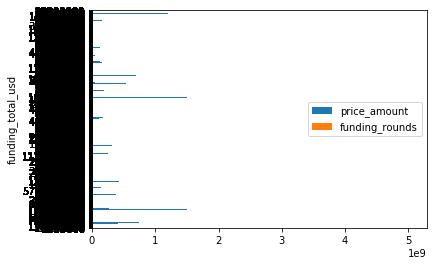

In [45]:
df.plot(kind = 'barh', x = 'funding_total_usd')